In [2]:
def extract_test_accuracies_by_run(log_file_path, output_file_path=None):
    with open(log_file_path, "r") as file:
        lines = file.readlines()

    runs = {}
    current_run = None

    for line in lines:
        line = line.strip()
        if line.startswith("Training Run"):
            current_run = line
            runs[current_run] = []
        elif "Accuracy on test set" in line and current_run:
            runs[current_run].append(line)

    # Prepare final output
    output_lines = []
    for run_name, accuracy_lines in runs.items():
        output_lines.append(run_name)
        output_lines.extend(accuracy_lines)
        output_lines.append("")  # Add a blank line between runs

    if output_file_path:
        with open(output_file_path, "w") as f:
            f.write("\n".join(output_lines))
        print(f"Filtered and organized results saved to {output_file_path}")
    else:
        print("\n".join(output_lines))


# Example usage:
# extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-AZ-2layers.log", "noiselessAmplitudeEmbedding-qmlp-AZ-2layers.txt")


In [3]:
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-AZ-10layers.log", "noiselessAmplitudeEmbedding-qmlp-AZ-10layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-AZ-10layers.txt


In [4]:
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-AZ-50layers.log", "noiselessAmplitudeEmbedding-qmlp-AZ-50layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-AZ-50|layers.txt


In [5]:
# noiselessAmplitudeEmbedding-qmlp-mnist-2layers
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-mnist-2layers.log", "noiselessAmplitudeEmbedding-qmlp-mnist-2layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-mnist-2layers.txt


In [6]:
# noiselessAmplitudeEmbedding-qmlp-mnist-2layers
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-mnist-10layers.log", "noiselessAmplitudeEmbedding-qmlp-mnist-10layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-mnist-10layers.txt


In [ ]:
# noiselessAmplitudeEmbedding-qmlp-mnist-2layers
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-mnist-50layers.log", "noiselessAmplitudeEmbedding-qmlp-mnist-50layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-mnist-50layers.txt


In [3]:
# noiselessAngleEmbedding-qmlp-AZ-2layers
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-AZ-2layers.log", "noiselessAngleEmbedding-qmlp-AZ-2layers.txt")
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-AZ-10layers.log", "noiselessAngleEmbedding-qmlp-AZ-10layers.txt")
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-AZ-50layers.log", "noiselessAngleEmbedding-qmlp-AZ-50layers.txt")


Filtered and organized results saved to noiselessAngleEmbedding-qmlp-AZ-2layers.txt
Filtered and organized results saved to noiselessAngleEmbedding-qmlp-AZ-10layers.txt
Filtered and organized results saved to noiselessAngleEmbedding-qmlp-AZ-50layers.txt


In [8]:
# noiselessAngleEmbedding-qmlp-mnist-2layers
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-mnist-2layers.log", "noiselessAngleEmbedding-qmlp-mnist-2layers.txt")

Filtered and organized results saved to noiselessAngleEmbedding-qmlp-mnist-2layers.txt


In [9]:
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-mnist-10layers.log", "noiselessAngleEmbedding-qmlp-mnist-10layers.txt")
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-mnist-50layers.log", "noiselessAngleEmbedding-qmlp-mnist-50layers.txt")

Filtered and organized results saved to noiselessAngleEmbedding-qmlp-mnist-10layers.txt
Filtered and organized results saved to noiselessAngleEmbedding-qmlp-mnist-50layers.txt


In [3]:
# noiselessAngleEmbedding-qmlp-AZ-2layers
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-AZ-5layers.log", "noiselessAmplitudeEmbedding-qmlp-AZ-5layers.txt")
extract_test_accuracies_by_run("noiselessAmplitudeEmbedding-qmlp-mnist-5layers.log", "noiselessAmplitudeEmbedding-qmlp-mnist-5layers.txt")
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-AZ-5layers.log", "noiselessAngleEmbedding-qmlp-AZ-5layers.txt")
# noiselessAngleEmbedding-qmlp-mnist-5layers
extract_test_accuracies_by_run("noiselessAngleEmbedding-qmlp-mnist-5layers.log", "noiselessAngleEmbedding-qmlp-mnist-5layers.txt")


Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-AZ-5layers.txt
Filtered and organized results saved to noiselessAmplitudeEmbedding-qmlp-mnist-5layers.txt
Filtered and organized results saved to noiselessAngleEmbedding-qmlp-AZ-5layers.txt
Filtered and organized results saved to noiselessAngleEmbedding-qmlp-mnist-5layers.txt


In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_avg_accuracy_per_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    all_runs = []
    current_run = []

    for line in lines:
        line = line.strip()
        if line.startswith("Training Run"):
            if current_run:
                all_runs.append(current_run)
                current_run = []
        elif "Accuracy on test set" in line:
            match = re.search(r"([\d.]+)%", line)
            if match:
                accuracy = float(match.group(1))
                current_run.append(accuracy)

    if current_run:
        all_runs.append(current_run)

    if not all_runs:
        return np.array([])
        
    min_len = min(len(run) for run in all_runs)
    all_runs = [run[:min_len] for run in all_runs]

    averaged = np.mean(all_runs, axis=0)
    return averaged

# def plot_multiple_averaged_accuracies(file_dict, s,name):
#     style_map = {
#         '2 Layers': {'color': '#377eb8', 'linestyle': '--', 'marker': 's'},
#         '5 Layers': {'color': '#ff7f00', 'linestyle': '-', 'marker': 'o'},
#         '10 Layers': {'color': '#ff7f00', 'linestyle': '-', 'marker': 'o'},
#         '50 Layers': {'color': '#4daf4a', 'linestyle': ':', 'marker': '^'}
#     }

#     plt.figure(figsize=(8, 5))
#     ax = plt.gca()
    
#     plot_order = ['2 Layers','5 layers','10 Layers', '50 Layers']
#     max_epochs = 0

#     for label in plot_order:
#         path = file_dict.get(label)
#         if not path:
#             continue
            
#         averaged = extract_avg_accuracy_per_file(path)
#         if averaged.size == 0:
#             continue

#         if len(averaged) > max_epochs:
#             max_epochs = len(averaged)
            
#         epochs = np.arange(1, len(averaged) + 1)
#         style = style_map[label]
        
#         ax.plot(epochs, averaged, 
#                 label=label, 
#                 color=style['color'],
#                 linestyle=style['linestyle'],
#                 marker=style['marker'],
#                 markersize=5,
#                 linewidth=1.8)

#     ax.set_title(s, fontsize=16, pad=20)
#     ax.set_xlabel("Epoch", fontsize=20)
#     ax.set_ylabel("Accuracy (%)", fontsize=20)

#     ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

#     ax.set_xticks(np.arange(0, max_epochs + 1, 5))
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.set_xlim(0, max_epochs + 1)
    
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_linewidth(1.2)
#     ax.spines['bottom'].set_linewidth(1.2)

#     ax.legend(loc='lower right', fontsize=18, frameon=False)
    
#     plt.tight_layout()
#     # plt.savefig("publication_plot.pdf", bbox_inches='tight')
#     plt.savefig(f"{name}.png", dpi=300, bbox_inches='tight')
#     plt.show()

def plot_multiple_averaged_accuracies(file_dict, s, name):
    style_map = {
        '2 Layers': {'color': '#377eb8', 'linestyle': '--', 'marker': 's'},
        '5 Layers': {'color': '#984ea3', 'linestyle': '-.', 'marker': 'D'},
        '10 Layers': {'color': '#ff7f00', 'linestyle': '-', 'marker': 'o'},
        '50 Layers': {'color': '#4daf4a', 'linestyle': ':', 'marker': '^'}
    }

    plot_order = ['2 Layers', '5 Layers', '10 Layers', '50 Layers']

    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    max_epochs = 0

    for label in plot_order:
        path = file_dict.get(label)
        if not path:
            continue

        averaged = extract_avg_accuracy_per_file(path)
        if averaged.size == 0:
            continue

        max_epochs = max(max_epochs, len(averaged))
        epochs = np.arange(1, len(averaged) + 1)
        style = style_map[label]

        ax.plot(epochs, averaged,
                label=label,
                color=style['color'],
                linestyle=style['linestyle'],
                marker=style['marker'],
                markersize=5,
                linewidth=4)

    ax.set_title(s, fontsize=16, pad=20)
    ax.set_xlabel("Epoch", fontsize=20)
    ax.set_ylabel("Accuracy (%)", fontsize=20)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    ax.set_xticks(np.arange(0, max_epochs + 1, 5))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim(0, max_epochs + 1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    ax.legend(loc='lower right', fontsize=18, frameon=False)

    plt.tight_layout()
    plt.savefig(f"{name}.png", dpi=300, bbox_inches='tight')
    # plt.savefig(f"{name}.pdf", bbox_inches='tight')  # Optional for vector version
    plt.show()


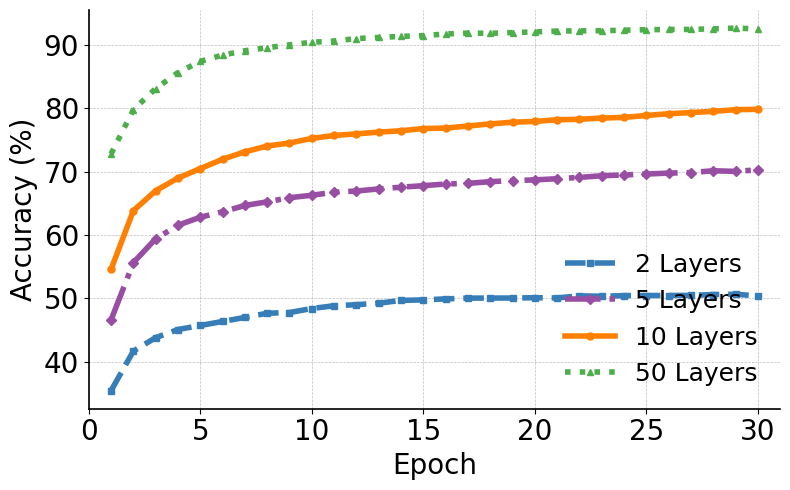

In [3]:
# Example usage:
file_dict = {
    "2 Layers": "noiselessAmplitudeEmbedding-qmlp-mnist-2layers.txt",
    "5 Layers": "noiselessAmplitudeEmbedding-qmlp-mnist-5layers.txt",
    "10 Layers": "noiselessAmplitudeEmbedding-qmlp-mnist-10layers.txt",
    "50 Layers": "noiselessAmplitudeEmbedding-qmlp-mnist-50layers.txt"  # already uploaded
}
s = ""
name = "mnist-amplitude"
plot_multiple_averaged_accuracies(file_dict, s,name)


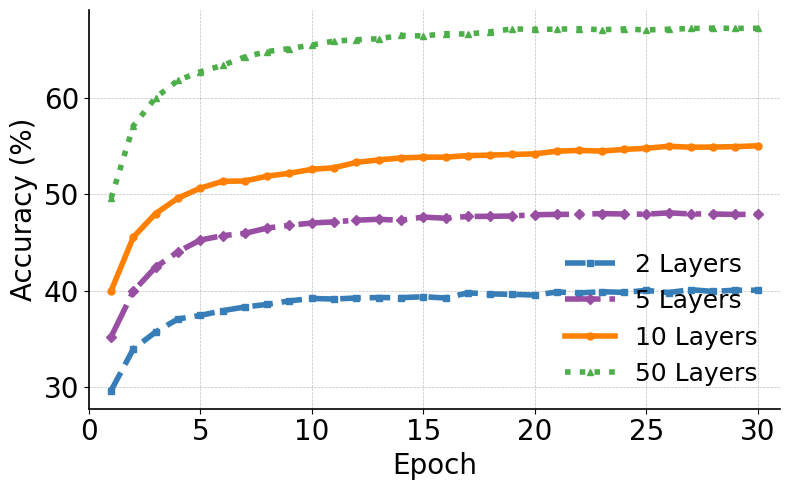

In [4]:
# Example usage:
file_dict = {
    "2 Layers": "noiselessAmplitudeEmbedding-qmlp-AZ-2layers.txt",
    "5 Layers": "noiselessAmplitudeEmbedding-qmlp-AZ-5layers.txt",
    "10 Layers": "noiselessAmplitudeEmbedding-qmlp-AZ-10layers.txt",
    "50 Layers": "noiselessAmplitudeEmbedding-qmlp-AZ-50layers.txt"  # already uploaded
}
s = ""
name = "Az-Task-Amplitude"
plot_multiple_averaged_accuracies(file_dict, s,name)

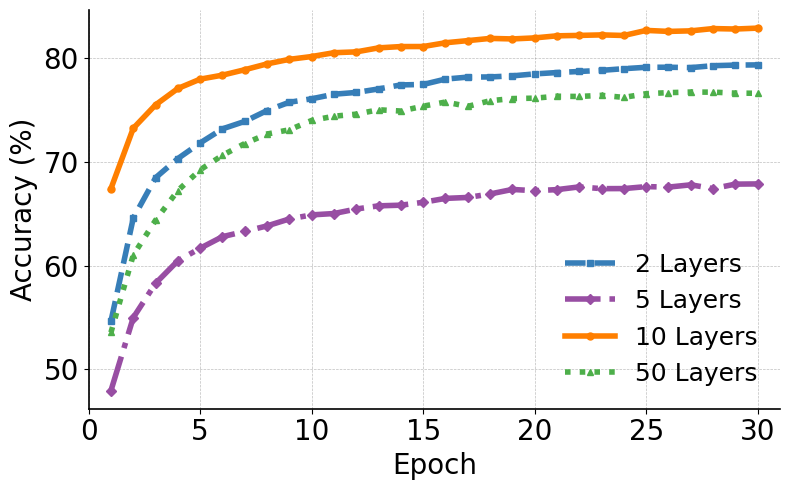

In [5]:

# Example usage:
file_dict = {
    "2 Layers": "noiselessAngleEmbedding-qmlp-mnist-2layers.txt",
    "5 Layers": "noiselessAngleEmbedding-qmlp-mnist-5layers.txt",
    "10 Layers": "noiselessAngleEmbedding-qmlp-mnist-10layers.txt",
    "50 Layers": "noiselessAngleEmbedding-qmlp-mnist-50layers.txt"
}
s = ""
name = "mnist-Angle"
plot_multiple_averaged_accuracies(file_dict, s,name)

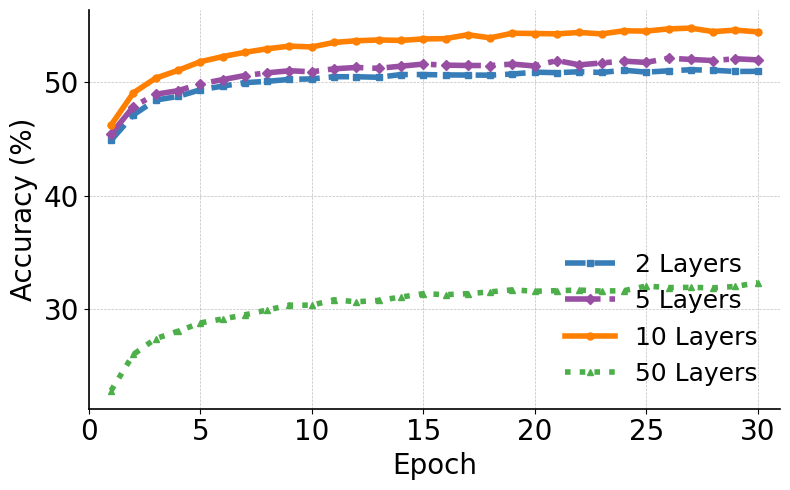

In [6]:
# noiselessAngleEmbedding-qmlp-AZ-2layers
file_dict = {
    "2 Layers": "noiselessAngleEmbedding-qmlp-AZ-2layers.txt",
    "5 Layers": "noiselessAngleEmbedding-qmlp-AZ-5layers.txt",
    "10 Layers": "noiselessAngleEmbedding-qmlp-AZ-10layers.txt",
    "50 Layers": "noiselessAngleEmbedding-qmlp-AZ-50layers.txt"
}
s = ""
name = "AZ-Task-Angle"
plot_multiple_averaged_accuracies(file_dict, s,name)